In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
import random
import glob
import matplotlib.gridspec as gs
import pint_xarray
import cf_xarray as cfxr
from eofs.xarray import Eof

In [2]:
from dask.distributed import Client, LocalCluster
client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43199 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43199/status,
Dashboard: /proxy/43199/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33919,Workers: 7
Dashboard: /proxy/43199/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:44689,Total threads: 2
Dashboard: /proxy/33499/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:36511,


In [3]:
ctrld = xr.open_mfdataset("/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/ocn/ocean_daily.nc*", use_cftime=True, chunks = {"time": 200})

In [4]:
ctrld = ctrld.sst

In [5]:
#select 951-1150

In [6]:
ctrld = ctrld.sel(time = slice("0951-01-01", "1150-12-31"))

In [7]:
daily_clim = ctrld.groupby("time.dayofyear").mean("time")

In [8]:
daily_clim

<xarray.DataArray 'sst' (dayofyear: 366, yt_ocean: 300, xt_ocean: 360)>
dask.array<stack, shape=(366, 300, 360), dtype=float32, chunksize=(1, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean   (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean   (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Attributes:
    long_name:      Potential temperature
    units:          degrees K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_surface_temperature

In [9]:
daily_clim = daily_clim.compute()

In [10]:
model_clim = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/global_sst_restoring_cm000_climatology_0951-1150.nc", decode_cf=False)

In [16]:
# Original time array
time_array = np.array([15., 44., 73.5, 104., 134.5, 165., 195.5, 226.5, 257., 287.5, 318.5, 349.])

# Calculate the daily time intervals
daily_time_array = np.linspace(0,366, 367)

# Create a new xarray DataArray with daily time intervals
daily_time_da = xr.DataArray(daily_time_array, dims=['TIME'], coords={'TIME': daily_time_array},
                              attrs={'long_name': 'time', 'units': 'days since 0000-01-01 00:00:00',
                                     'time_origin': '01-JAN-0000 00:00:00', 'modulo': 365.242492675781,
                                     'axis': 'T', 'calendar': 'gregorian'})

In [17]:
daily_time_da

<xarray.DataArray (TIME: 367)>
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
       154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
       165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175.,
       176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 204., 205., 206., 207., 208.,
       209., 210., 211., 212., 213., 214., 215., 216., 217., 218., 219.,
       220., 221., 222., 223., 224., 225., 226., 227., 228., 229., 230.,
       231., 232., 233., 234., 235., 236., 237., 238., 239., 240., 241.,
       242., 243., 244., 245., 246., 247., 248., 249., 250., 251., 252.,
       253., 254., 255., 256., 257., 258., 259., 260., 261., 262., 263.,
       264., 265., 266., 267., 268., 269., 270., 271., 272., 273., 274.,
       275., 276., 277., 278., 279., 280., 281., 282., 283., 284., 285.,
       286., 287., 288., 289., 290., 291., 292., 293., 294., 295., 296.,
       297., 298., 299., 300., 301., 302., 303., 304., 305., 306., 307.,
       308., 309., 310., 311., 312., 313., 314., 315., 316., 317., 318.,
       319., 320., 321., 322., 323., 324., 325., 326., 327., 328., 329.,
       330., 331., 332., 333., 334., 335., 336., 337., 338., 339., 340.,
       341., 342., 343., 344., 345., 346., 347., 348., 349., 350., 351.,
       352., 353., 354., 355., 356., 357., 358., 359., 360., 361., 362.,
       363., 364., 365., 366.])
Coordinates:
  * TIME     (TIME) float64 0.0 1.0 2.0 3.0 4.0 ... 363.0 364.0 365.0 366.0
Attributes:
    long_name:    time
    units:        days since 0000-01-01 00:00:00
    time_origin:  01-JAN-0000 00:00:00
    modulo:       365.242492675781
    axis:         T
    calendar:     gregorian

In [12]:
#now apply dimesions to the daily cliamtology

In [18]:
model_clim

<xarray.Dataset>
Dimensions:   (TIME: 12, DEPTH1_1: 1, GRID_Y_T: 300, GRID_X_T: 360)
Coordinates:
  * TIME      (TIME) float64 15.0 44.0 73.5 104.0 ... 257.0 287.5 318.5 349.0
  * DEPTH1_1  (DEPTH1_1) float64 0.0
  * GRID_Y_T  (GRID_Y_T) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * GRID_X_T  (GRID_X_T) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
Data variables:
    temp      (TIME, DEPTH1_1, GRID_Y_T, GRID_X_T) float32 ...
Attributes:
    description:  Monthly SST climatology from years 951-1150 of ACCESS-CM2 p...
    history:      Created 28/11/22

In [22]:
last_day = daily_clim[364]

In [24]:
last_day["dayofyear"] = 0

In [28]:
longer_clim = xr.concat([last_day, daily_clim], dim = "dayofyear")

In [33]:
Daily_clim_new_dims = longer_clim.rename({"xt_ocean":"GRID_X_T", "yt_ocean":"GRID_Y_T", "dayofyear":"TIME"})

In [35]:
Daily_clim_new_dims = Daily_clim_new_dims.expand_dims(dim =  {"DEPTH1_1":model_clim.DEPTH1_1})
Daily_clim_new_dims = Daily_clim_new_dims.assign_coords({"GRID_X_T": model_clim.GRID_X_T,
                           "GRID_Y_T": model_clim.GRID_Y_T,
                           "DEPTH1_1":model_clim.DEPTH1_1,
                          "TIME": daily_time_da})

In [36]:
Daily_clim_new_dims

<xarray.DataArray 'sst' (DEPTH1_1: 1, GRID_Y_T: 300, GRID_X_T: 360, TIME: 367)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * DEPTH1_1  (DEPTH1_1) float64 0.0
  * GRID_X_T  (GRID_X_T) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * GRID_Y_T  (GRID_Y_T) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * TIME      (TIME) float64 0.0 1.0 2.0 3.0 4.0 ... 363.0 364.0 365.0 366.0
Attributes:
    long_name:      Potential temperature
    units:          degrees K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_surface_temperature

In [27]:
Daily_clim_new_dims = Daily_clim_new_dims.assign_attrs({"long_name": "Climatology SST restoring", "units": "degrees K", "valid_range": np.array([-10., 500.], dtype=np.float32)})
Daily_clim_new_dims = Daily_clim_new_dims.to_dataset(name = 'temp')
Daily_clim_new_dims =Daily_clim_new_dims.assign_attrs({"description": "Daily SST climatology from years 951-1150 of ACCESS-CM2 piControl (suite cm000) for ACCESS-CM2 pacemaker experiments, Sebastian McKenna",
                                 "history": "Created 07/05/24"})

Daily_clim_new_dims = Daily_clim_new_dims[["TIME", "DEPTH1_1", "GRID_Y_T", "GRID_X_T", "temp"]]
# Save the data array to the output file
Daily_clim_new_dims.to_netcdf("/g/data/e14/sm2435/Pacemaker/daily_sst_restoring_cm000_climatology_0951-1150.nc", encoding = {"TIME": {"_FillValue": None},
                                                        "DEPTH1_1": {"_FillValue": None},
                                                        "GRID_Y_T": {"_FillValue": None},
                                                        "GRID_X_T": {"_FillValue": None},
                                                        "temp": {"_FillValue": -1.e+20}}, unlimited_dims="TIME")

In [17]:
#now to add in the ellipse and see what happens when you run for 

In [37]:
mask = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/sst_restore_mask_25N_25S_5deg_damping_trop_pacific.nc", decode_times=False)

In [38]:
mask = mask.restore_mask

In [39]:
mask0 = (mask*0)

In [40]:
import scipy

In [41]:
def create_ellipse(mask, centre_lon, width, height):
    mask0 = (mask*0)
    # Create a 2D grid of latitudes and longitudes
    lons, lats = np.meshgrid(mask.GRID_X_T, mask.GRID_Y_T)

    # Create an ellipse-shaped mask
    center_lon = centre_lon  # Center longitude of the ellipse
    center_lat = 0   # Center latitude of the ellipse
    semi_major_axis = width/2  # Semi-major axis of the ellipse in degrees
    semi_minor_axis = height/2  # Semi-minor axis of the ellipse in degrees

    # Equation of the ellipse: (x - x0)**2 / a**2 + (y - y0)**2 / b**2 = 1
    ellipse_mask = ((lons - center_lon) ** 2) / (semi_major_axis ** 2) + ((lats - center_lat) ** 2) / (semi_minor_axis ** 2) <= 1
    #now add in linear damping over 5 gridcells
    t = ellipse_mask.astype(int)
    t1 = scipy.ndimage.binary_erosion(t)
    t2 = scipy.ndimage.binary_erosion(t1)
    t3 = scipy.ndimage.binary_erosion(t2)
    t4 = scipy.ndimage.binary_erosion(t3)
    t5 = scipy.ndimage.binary_erosion(t4)
    t01 = t-t1
    t03 = t-t2-t01
    t05 = t-t3-t03-t01
    t07 = t-t4-t05-t03-t01
    t09 = t-t5-t07-t05-t03-t01
    t_1L = t-t09-t07-t05-t03-t01
    t_taperL = t_1L +(0.9*t09) +(0.7*t07)+(0.5*t05)+(0.3*t03)+(0.1*t01)
    
    # Create a DataArray with the mask
    mask_dataarray = xr.DataArray(t_taperL, dims=('GRID_Y_T', 'GRID_X_T'), coords={'GRID_Y_T': mask.GRID_Y_T, 'GRID_X_T': mask.GRID_X_T})

    # Apply the mask to your DataArray
    dataarray_masked = mask0 + mask_dataarray
    return mask_dataarray

In [42]:
CP_mask = create_ellipse(mask, -160, 60, 20)

In [43]:
EP_mask = create_ellipse(mask, -110, 60, 20)

In [44]:
#load in climatology and the anomly data. Mask the anmly and then add to climatology. 

In [45]:
model_clim = xr.open_dataset("/g/data/e14/sm2435/Pacemaker/global_sst_restoring_cm000_climatology_0951-1150.nc", decode_cf=False)

In [46]:
MC = model_clim.temp

In [47]:
#Create the cosine from may 16 to august 15 next year

In [54]:
time = np.linspace(1, 460, 460)

# Define the y values using the scaled cosine function
cosine_curve = 1.5*(1-(np.cos((time/460)*2*np.pi)))
#cosine_curve = -1.5 * (1 - np.cos(time - phase_shift)) +3
#cosine_curve -= cosine_curve[0]
#cosine_curve[:2] = 0
#da_cosine_curve = xr.DataArray(cosine_curve, coords={'month': np.arange(5,20,1)}, dims=['month'])

In [55]:
new_curve = np.concatenate((np.zeros(121), cosine_curve, np.zeros(153)))

In [53]:
new_curve.shape

(733,)

In [56]:
#split array into 2
cosin_yr1 = new_curve[:367]
cosin_yr2 = new_curve[367:]

In [33]:
cosin_yr1_new = np.concatenate([cosin_yr1[:365],np.zeros(1)])

In [36]:
cosin_yr1_new.shape

(366,)

In [60]:
da_cosine_curve1 = xr.DataArray(cosin_yr1, coords={'TIME': daily_time_da}, dims=['TIME'])
da_cosine_curve2 = xr.DataArray(cosin_yr2, coords={'TIME': daily_time_da}, dims=['TIME'])

In [66]:
da_cosine_curve1[366]

<xarray.DataArray ()>
array(2.96432072)
Coordinates:
    TIME     float64 366.0

In [75]:
EP_clim1 = (EP_mask*da_cosine_curve1)
EP_clim2 = (EP_mask*da_cosine_curve2)
CP_clim1 = (CP_mask*da_cosine_curve1)
CP_clim2 = (CP_mask*da_cosine_curve2)

In [68]:
EP_clim1 = EP_clim1.expand_dims(dim =  {"DEPTH1_1":model_clim.DEPTH1_1})
EP_clim2 = EP_clim2.expand_dims(dim =  {"DEPTH1_1":model_clim.DEPTH1_1})
CP_clim1 = CP_clim1.expand_dims(dim =  {"DEPTH1_1":model_clim.DEPTH1_1})
CP_clim2 = CP_clim2.expand_dims(dim =  {"DEPTH1_1":model_clim.DEPTH1_1})


In [81]:
idealised_EP_anom_yr1 = Daily_clim_new_dims + EP_clim1
idealised_EP_anom_yr2 = Daily_clim_new_dims + EP_clim2

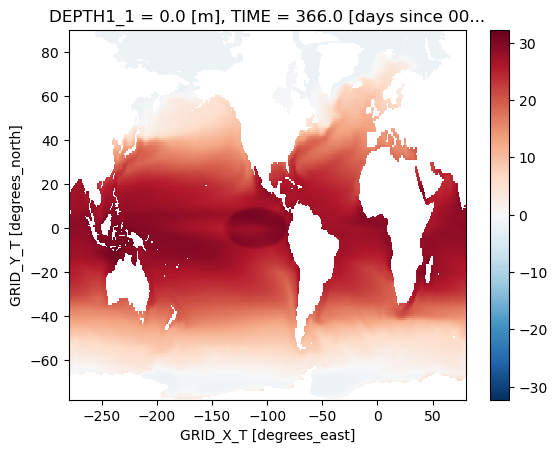

In [84]:
idealised_EP_anom_yr1[0,:,:,-1].plot()

In [70]:
idealised_CP_anom_yr1 = Daily_clim_new_dims + CP_clim1
idealised_CP_anom_yr2 = Daily_clim_new_dims + CP_clim2

In [85]:
idealised_EP_anom_yr1 = idealised_EP_anom_yr1.assign_attrs({"long_name": "Climatology SST restoring", "units": "degrees K", "valid_range": np.array([-10., 500.], dtype=np.float32)})
idealised_EP_anom_yr1 = idealised_EP_anom_yr1.to_dataset(name = 'temp')
idealised_EP_anom_yr1 =idealised_EP_anom_yr1.assign_attrs({"description": "Idealised SST for year 0 evolution of EP El Nino events generated with daily SST climatology from years 951-1150 of ACCESS-CM2 piControl (suite cm000) plus cosine curve that goes from 0 to 3 between May 1 (0) and July 31 (1) (no anomaly added to other times). For ACCESS-CM2 pacemaker experiments, Sebastian McKenna",
                                 "history": "Created 07/05/24"})

idealised_EP_anom_yr1 = idealised_EP_anom_yr1[["TIME", "DEPTH1_1", "GRID_Y_T", "GRID_X_T", "temp"]]
# Save the data array to the output file
idealised_EP_anom_yr1.to_netcdf("/g/data/e14/sm2435/Pacemaker/daily_0_Idealised_EP_anomaly_yr0.nc", encoding = {"TIME": {"_FillValue": None},
                                                        "DEPTH1_1": {"_FillValue": None},
                                                        "GRID_Y_T": {"_FillValue": None},
                                                        "GRID_X_T": {"_FillValue": None},
                                                        "temp": {"_FillValue": -1.e+20}}, unlimited_dims="TIME")

In [78]:
idealised_EP_anom_yr2 = idealised_EP_anom_yr2.assign_attrs({"long_name": "Climatology SST restoring", "units": "degrees K", "valid_range": np.array([-10., 500.], dtype=np.float32)})
idealised_EP_anom_yr2 = idealised_EP_anom_yr2.to_dataset(name = 'temp')
idealised_EP_anom_yr2 =idealised_EP_anom_yr2.assign_attrs({"description": "Idealised SST for year 1 evolution of EP El Nino events generated with daily SST climatology from years 951-1150 of ACCESS-CM2 piControl (suite cm000) plus cosine curve that goes from 0 to 3 between May 1 (0) and July 31 (1) (no anomaly added to other times). For ACCESS-CM2 pacemaker experiments, Sebastian McKenna",
                                 "history": "Created 07/05/24"})

idealised_EP_anom_yr2 = idealised_EP_anom_yr2[["TIME", "DEPTH1_1", "GRID_Y_T", "GRID_X_T", "temp"]]
# Save the data array to the output file
idealised_EP_anom_yr2.to_netcdf("/g/data/e14/sm2435/Pacemaker/daily_Idealised_EP_anomaly_yr1.nc", encoding = {"TIME": {"_FillValue": None},
                                                        "DEPTH1_1": {"_FillValue": None},
                                                        "GRID_Y_T": {"_FillValue": None},
                                                        "GRID_X_T": {"_FillValue": None},
                                                        "temp": {"_FillValue": -1.e+20}}, unlimited_dims="TIME")

In [79]:
idealised_CP_anom_yr1 = idealised_CP_anom_yr1.assign_attrs({"long_name": "Climatology SST restoring", "units": "degrees K", "valid_range": np.array([-10., 500.], dtype=np.float32)})
idealised_CP_anom_yr1 = idealised_CP_anom_yr1.to_dataset(name = 'temp')
idealised_CP_anom_yr1 =idealised_CP_anom_yr1.assign_attrs({"description": "Idealised SST for year 0 evolution of CP El Nino events generated with daily SST climatology from years 951-1150 of ACCESS-CM2 piControl (suite cm000) plus cosine curve that goes from 0 to 3 between May 1 (0) and July 31 (1) (no anomaly added to other times). For ACCESS-CM2 pacemaker experiments, Sebastian McKenna",
                                 "history": "Created 07/05/24"})

idealised_CP_anom_yr1 = idealised_CP_anom_yr1[["TIME", "DEPTH1_1", "GRID_Y_T", "GRID_X_T", "temp"]]
# Save the data array to the output file
idealised_CP_anom_yr1.to_netcdf("/g/data/e14/sm2435/Pacemaker/daily_Idealised_CP_anomaly_yr0.nc", encoding = {"TIME": {"_FillValue": None},
                                                        "DEPTH1_1": {"_FillValue": None},
                                                        "GRID_Y_T": {"_FillValue": None},
                                                        "GRID_X_T": {"_FillValue": None},
                                                        "temp": {"_FillValue": -1.e+20}}, unlimited_dims="TIME")

In [80]:
idealised_CP_anom_yr2 = idealised_CP_anom_yr2.assign_attrs({"long_name": "Climatology SST restoring", "units": "degrees K", "valid_range": np.array([-10., 500.], dtype=np.float32)})
idealised_CP_anom_yr2 = idealised_CP_anom_yr2.to_dataset(name = 'temp')
idealised_CP_anom_yr2 =idealised_CP_anom_yr2.assign_attrs({"description": "Idealised SST for year 1 evolution of CP El Nino events generated with daily SST climatology from years 951-1150 of ACCESS-CM2 piControl (suite cm000) plus cosine curve that goes from 0 to 3 between May 1 (0) and July 31 (1) (no anomaly added to other times). For ACCESS-CM2 pacemaker experiments, Sebastian McKenna",
                                 "history": "Created 07/05/24"})

idealised_CP_anom_yr2 = idealised_CP_anom_yr2[["TIME", "DEPTH1_1", "GRID_Y_T", "GRID_X_T", "temp"]]
# Save the data array to the output file
idealised_CP_anom_yr2.to_netcdf("/g/data/e14/sm2435/Pacemaker/daily_Idealised_CP_anomaly_yr1.nc", encoding = {"TIME": {"_FillValue": None},
                                                        "DEPTH1_1": {"_FillValue": None},
                                                        "GRID_Y_T": {"_FillValue": None},
                                                        "GRID_X_T": {"_FillValue": None},
                                                        "temp": {"_FillValue": -1.e+20}}, unlimited_dims="TIME")

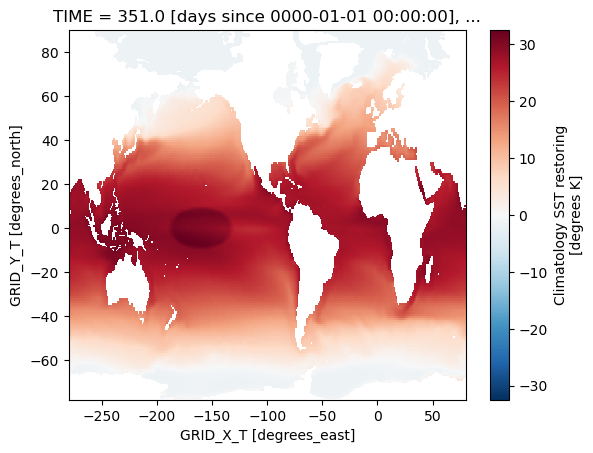

In [82]:
idealised_CP_anom_yr1.temp[0,350].plot()